1. Going through the 6 step ML framework

# 1.1 Problem Definition
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information such as health characteristics) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# 1.2 How will we evaluate our model?
An evaluation metric is something you usually define at the start of a project.

However, since machine learning is very experimental, it can change over time.

But to begin a project, you might say something like:

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

Of course, as the project progresses and gets tested in the real world, you may have to adjust this goal/threshold.

# 2. Preparing the tools
At the start of any project, it's custom to see the required libraries imported in a big chunk (as you can see in the code cell below).

However, in practice, when starting on new projects you may import libraries as you go (because you don't know what you need ahead of time).

After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up.

This is where you may want to consolidate every library you've used at the top of your notebook.

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

pandas for data analysis.
NumPy for numerical operations.
Matplotlib/seaborn for plotting or data visualization.
Scikit-Learn for machine learning modelling and evaluation.

In [8]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display our plots inside our notebooks
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# 3. Loading Data
There are many different ways to store data.

One typical way of storing tabular data, data similar to what you'd see in an Excel file is in .csv format or CSV format.

CSV stands for comma-separated values.

Other common formats include JSON, SQL and parquet.

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

Note: CSV format is good for smaller datasets but can face some speed issues when working with larger datasets. For more on different data formats pandas is compatible with, I'd check out the pandas guide on reading and writing data.

And there are many more read functions for different data formats in the Input/Output section of the pandas documentation.

In [9]:
# Panda Dataframe
df = pd.read_csv("heart-disease.csv") # source: https://archive.ics.uci.edu/dataset/45/heart+disease

# df.tail() - See last 5 rows of dataframe
df.shape

(303, 14)

## Heart disease features information:

In [41]:
info = pd.read_csv("heart-info.csv").fillna("")

info

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,age,Feature,Integer,Age,,years,no
1,sex,Feature,Categorical,Sex,,,no
2,cp,Feature,Categorical,,chest pain type: 0 - Typical Angine; 1 - Atypi...,,no
3,trestbps,Feature,Integer,,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,,fasting blood sugar > 120 mg/dl,,no
6,restecg,Feature,Categorical,,,,no
7,thalach,Feature,Integer,,maximum heart rate achieved,,no
8,exang,Feature,Categorical,,exercise induced angina,,no
9,oldpeak,Feature,Integer,,ST depression induced by exercise relative to ...,,no


# 4. Data Exploration (exploratory data analysis or EDA)
Once we've imported the dataset, the next step is to explore.

Or in formal terms, perform an Exploratory Data Analysis (EDA).

There's no set way of doing this.

But what you should be trying to do is become more and more familiar with the dataset.

Comparing different columns to each other, comparing them to the target variable.

Refering back to your data dictionary and remind of what different columns mean.

Viewing 10-100 random samples of the data.

Our goal here is to become a subject matter expert on the dataset we're working with.

So if someone asks us a question about it, we can give them an explanation and when you start building models, we can sound check them to make sure they're not performing too well (overfitting and memorizing the data rather than learning generalizable patterns) or why they might be performing poorly (underfitting or not learning patterns in the data).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

What question(s) are you trying to solve (or prove wrong)?
What kind of data do you have and how do you treat different types?
What’s missing from the data and how do you deal with it?
Where are the outliers and why should you care about them?
How can you add, change or remove features to get more out of your data?

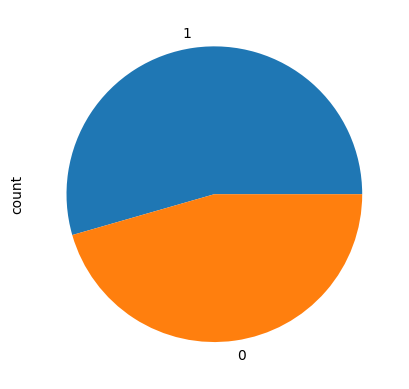

In [10]:
# Check if our dataset is balanced
df.target.value_counts().plot(kind="pie", color=["red", "blue"]);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
# Are there any missing values in any column of our dataframe?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Frequency according to Sex

In [31]:
df.sex.value_counts() # In this dataset males are 1 and females are 0

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

# 75% of women have heart disease in this dataset
# 44.92% of men have heart disease in this dataset
# (72 + 93) / (96 + 207) # 54.455% of all patients have heart disease

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Amount')

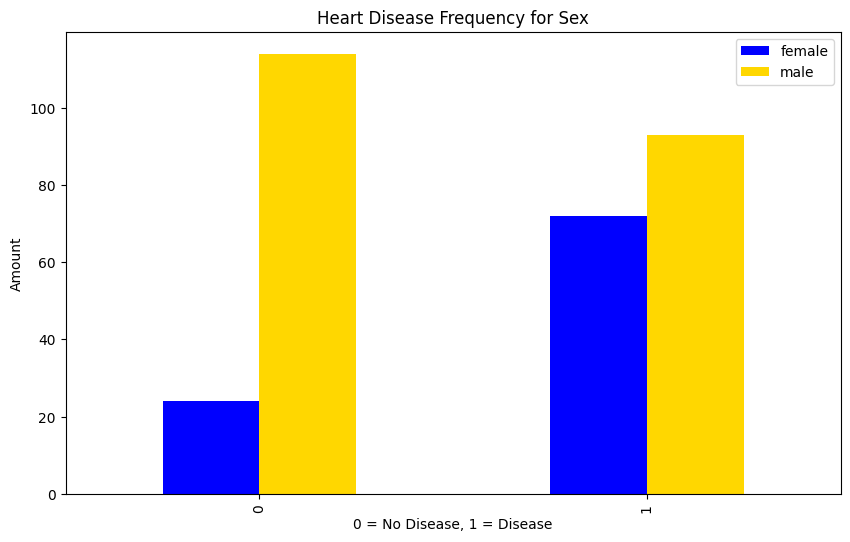

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["blue", "gold"], figsize=(10, 6))

plt.title("Heart Disease Frequency for Sex")
plt.legend(["female", "male"])
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")

### Scatter Plot Of Patient Age x Max Heart Rate

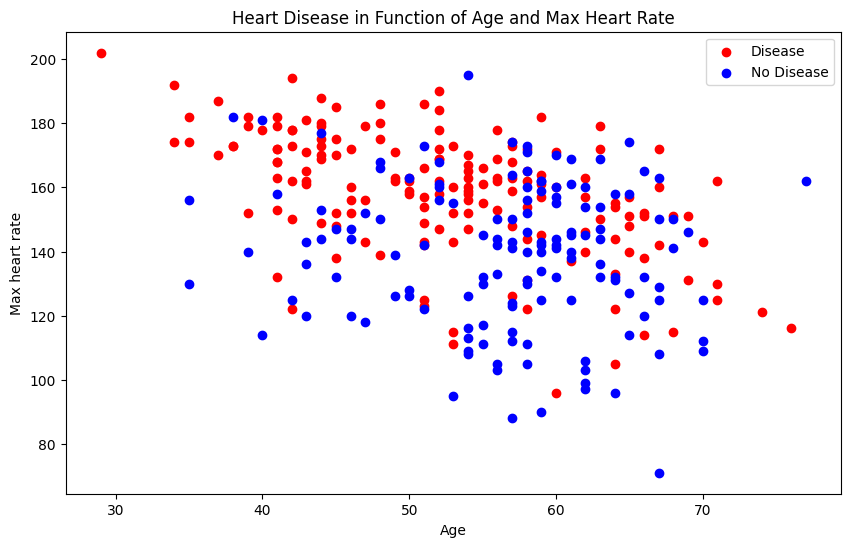

In [31]:
plt.figure(figsize=(10, 6))

_heart_disease = df.target == 1
_no_heart_disease = df.target == 0

# Patients with Heart Disease
plt.scatter(df.age[_heart_disease], df.thalach[_heart_disease], c="red")

# Patients without Heart Disease
plt.scatter(df.age[_no_heart_disease], df.thalach[_no_heart_disease], c="blue");bb

plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"])

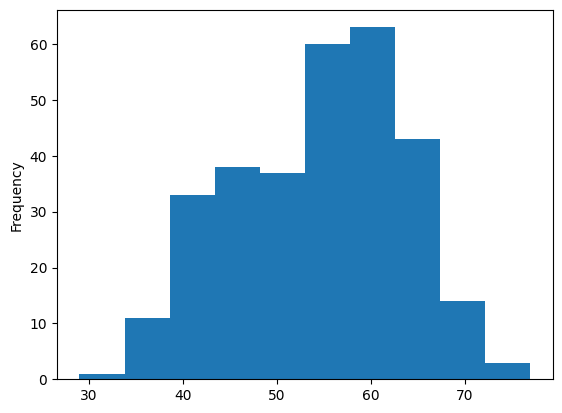

In [34]:
# Check the distribution of the age column with histogram

df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

**Chest pain types**:

    0: Typical angina (chest pain)
    1: Atypical angina (chest pain not related to heart)
    2: Non-anginal pain (typically esophageal spasms (non heart related)
    3: Asymptomatic (chest pain not showing signs of disease)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


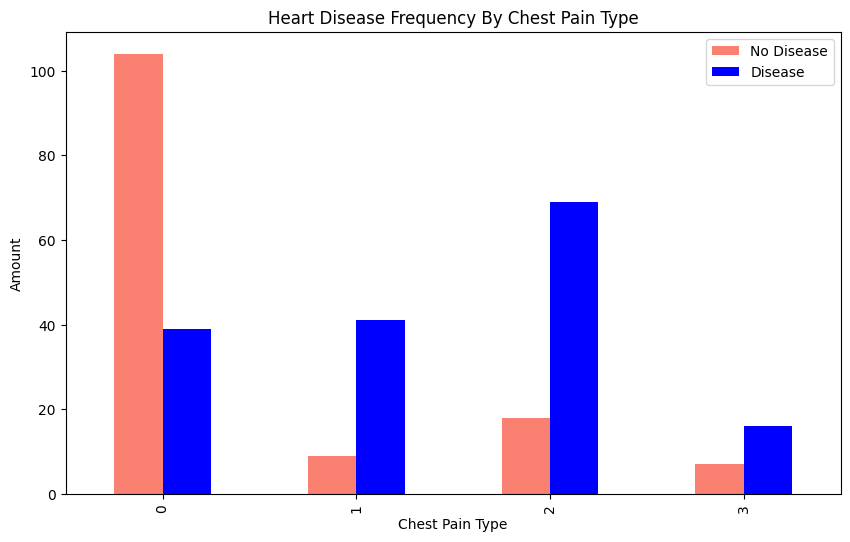

In [53]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "blue"])

plt.title("Heart Disease Frequency By Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);

pd.crosstab(df.cp, df.target)

# Many patients with heart disease have chest pain type 2: 
# Non-anginal pain (typically esophageal spasms (non heart related) that in theory souldn't be heart related

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Create a correlation table
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


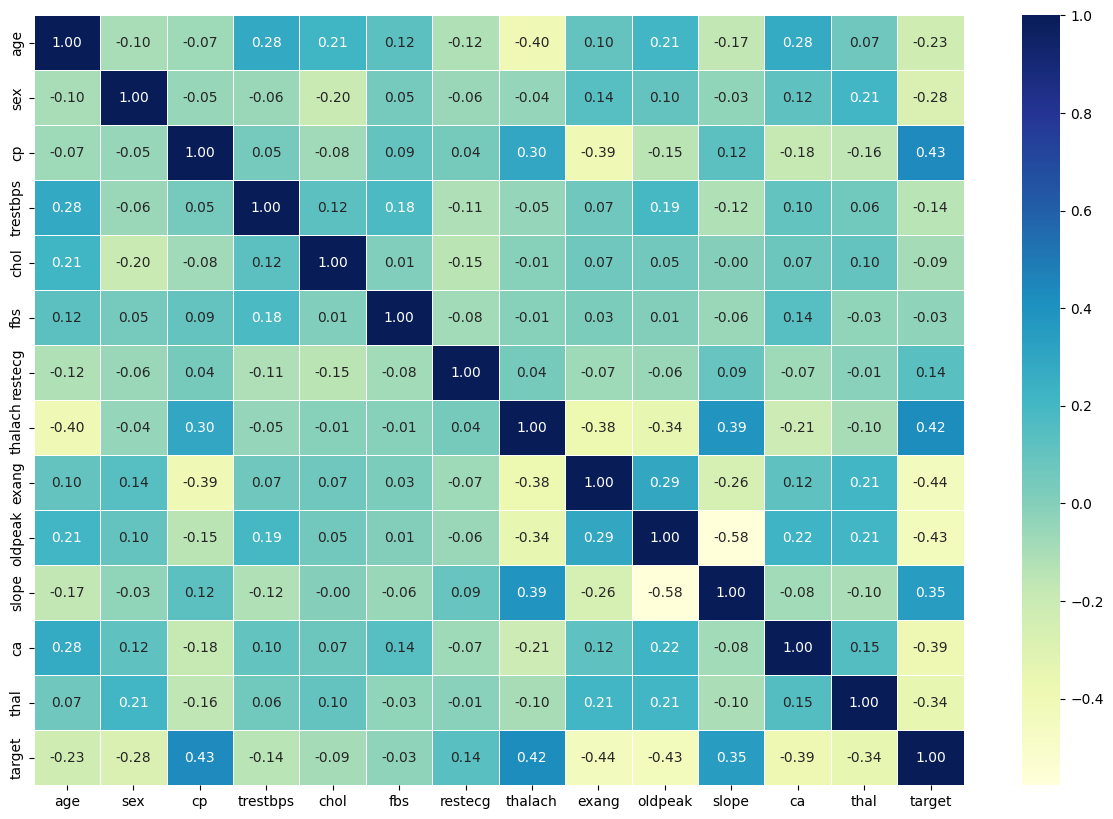

In [55]:
# Visualise correlation table using seaborn heatmap
correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")



# 5. Modelling

In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
# Split data into x and y

x = df.drop("target", axis=1)
y = df.target

In [64]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [65]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [67]:
# Split data into train and test sets

np.random.seed(42)

# Split into train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [68]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [69]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

We are going to try 3 different machine learning models:

1. Logistic Regression - Despite it's name it is a model for classification instead of regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [79]:
# Add models to dictionary
models = {"Logistic Regression": LogisticRegression(), "K-Nearest Neighbours Classifier": KNeighborsClassifier(), "Random Forest Classifier": RandomForestClassifier()}

# Create function to fit and score models

def fit_and_score(models):
    # Set random seed
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        # Fit model to the data
        model.fit(x_train, y_train)

        # Evaluate model and append to model_scores
        model_scores[name] = model.score(x_test, y_test)

    return model_scores

model_scores = fit_and_score(models)
    
model_scores

/opt/anaconda3/envs/heart/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

<Axes: >

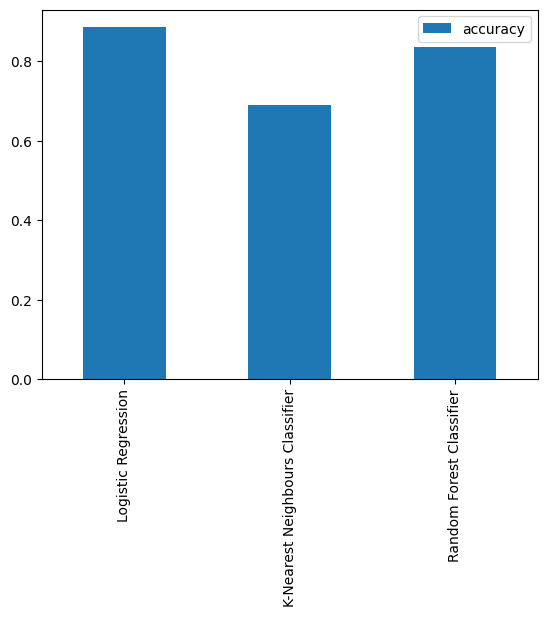

In [85]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()